# Content with notebooks

You can also create content with Jupyter Notebooks. This means that you can include
code blocks and their outputs in your book.

## Markdown + notebooks

As it is markdown, you can embed images, HTML, etc into your posts!

![](https://myst-parser.readthedocs.io/en/latest/_static/logo-wide.svg)

You can also $add_{math}$ and

$$
math^{blocks}
$$

or

$$
\begin{aligned}
\mbox{mean} la_{tex} \\ \\
math blocks
\end{aligned}
$$

But make sure you \$Escape \$your \$dollar signs \$you want to keep!

## MyST markdown

MyST markdown works in Jupyter Notebooks as well. For more information about MyST markdown, check
out [the MyST guide in Jupyter Book](https://jupyterbook.org/content/myst.html),
or see [the MyST markdown documentation](https://myst-parser.readthedocs.io/en/latest/).

## Code blocks and outputs

Jupyter Book will also embed your code blocks and output in your book.
For example, here's some sample Matplotlib code:

In [ ]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

plt.ion()

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173929 entries, 0 to 173928
Columns: 253 entries, don_id to odo
dtypes: float64(76), int64(9), object(168)
memory usage: 335.7+ MB
None
       don_age_in_months        don_age    don_race
count      173922.000000  173922.000000  838.000000
mean          493.620244      40.676142   65.250597
std           139.174427      11.600951   48.149922
min             0.000000       0.000000   24.000000
25%           385.000000      32.000000   40.000000
50%           489.000000      40.000000   40.000000
75%           595.000000      49.000000   72.000000
max          1151.000000      95.000000  248.000000


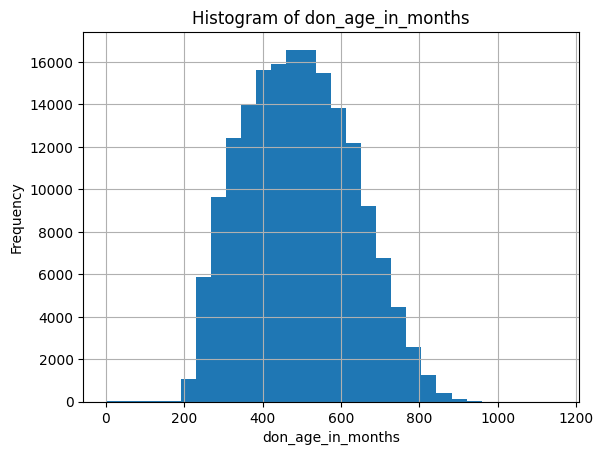

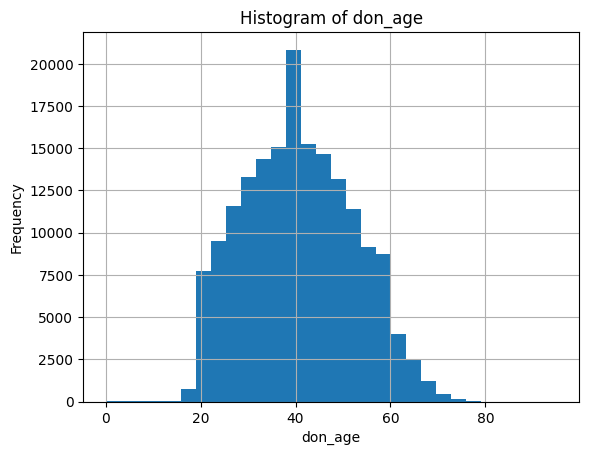

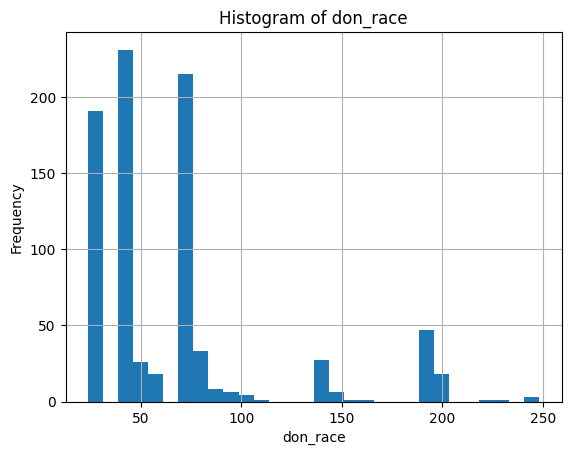

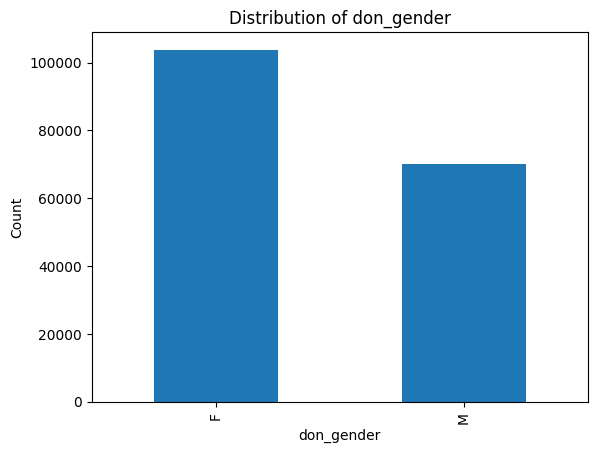

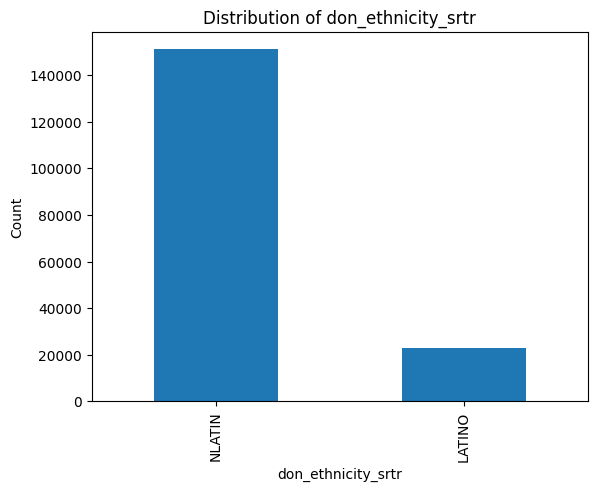

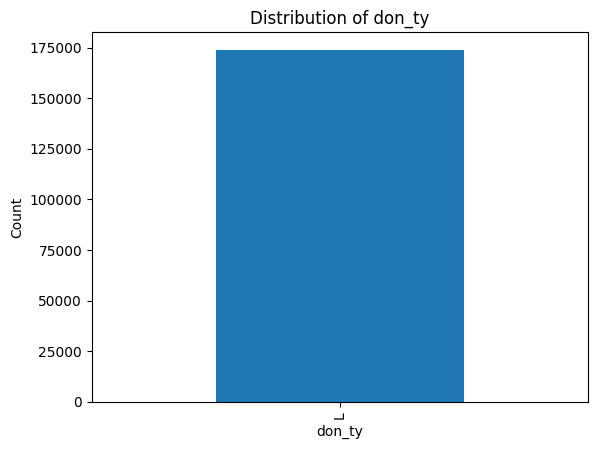

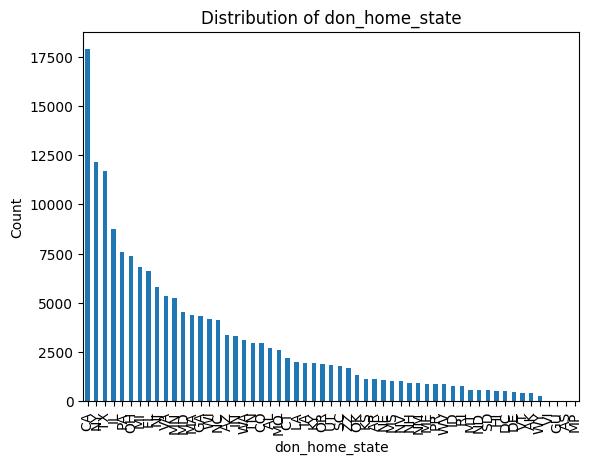

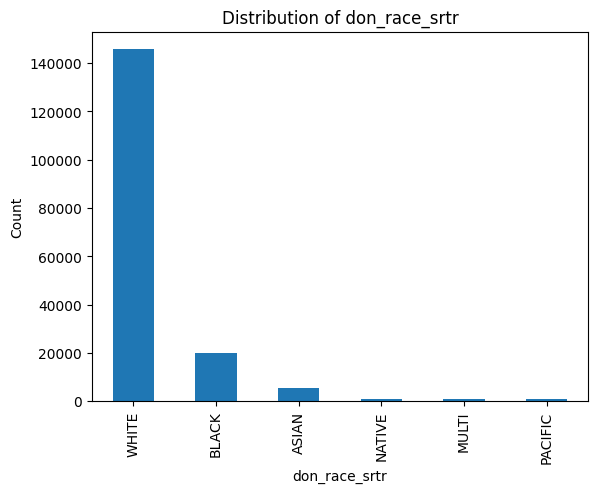

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Load data without specifying data types initially
df = pd.read_csv('~/documents/github/csv/donor_live.csv', low_memory=False)

# Print DataFrame info to verify load
print(df.info())

# Clean and convert data types
df['pers_id'] = pd.to_numeric(df['pers_id'], errors='coerce')
df['don_age_in_months'] = pd.to_numeric(df['don_age_in_months'], errors='coerce')
df['don_age'] = pd.to_numeric(df['don_age'], errors='coerce')
df['don_race'] = pd.to_numeric(df['don_race'], errors='coerce')

# Display basic statistics for continuous variables
print(df[['don_age_in_months', 'don_age', 'don_race']].describe())

# Plot histograms for continuous variables
continuous_vars = ['don_age_in_months', 'don_age', 'don_race']

for var in continuous_vars:
    plt.figure()
    df[var].dropna().hist(bins=30)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Count and plot binary/categorical variables
binary_vars = ['don_gender', 'don_ethnicity_srtr']
categorical_vars = ['don_ty', 'don_home_state', 'don_race_srtr']

for var in binary_vars + categorical_vars:
    plt.figure()
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('~/documents/github/csv/donor_live.csv')

# Show the DataFrame

You can find the dimensions of a DataFrame using the `.shape` attribute. This attribute returns a tuple representing the dimensions of the DataFrame, where the first element is the number of rows and the second is the number of columns.

Here's how to find the dimensions of your DataFrame `df`:

In [ ]:
# Get the dimensions of the DataFrame
rows, cols = df.shape

# Print the dimensions
print(f"The DataFrame has {rows} rows and {cols} columns.")


This will give you a quick idea of how large your dataset is.

---

Next, you can use the `.head()` method to print the first 5 rows of your DataFrame. This is a good way to get a feel for what information is in your dataset. You can pass a number into the `.head()` method to print a different number of rows. For example, `df.head(10)` will print the first 10 rows of your DataFrame.

In [ ]:
df.head()

You can restrict the DataFrame to a subset of rows and columns using slicing. Here's how to keep only the first 1000 rows and the first 9 columns:

In [ ]:
# Subset the DataFrame
subset_df = df.iloc[:1000, :9]

# Show the shape of the new DataFrame to confirm
print(f"The shape of the subset DataFrame is {subset_df.shape}")




<b>Explanation</b>:

- `df.iloc[:1000, :9]` uses the `iloc` indexer for Pandas DataFrames. The `:1000` selects the first 1000 rows and the `:9` selects the first 9 columns.

- `subset_df.shape` will display the shape of the new DataFrame, which should be (1000, 9) to confirm that you've correctly subsetted it.

Now `subset_df` contains only the first 1000 rows and the first 9 columns of the original `df`.

In [ ]:
subset_df.head()

In [ ]:
# Select the first 100 rows and cherry-pick columns by index (e.g., columns at index 0, 2, 4, and 6)
subset_csv = df.iloc[:100, [3, 4, 6]]
subset_csv.to_csv('~/documents/github/work/subset.csv', index=False)


In [ ]:
# Summary statistics to identify continuous variables
cont_summary = subset_df.describe()
print("Continuous Variables:")
print(cont_summary.columns.tolist())  # These are likely to be continuous variables

# Identify binary variables
binary_vars = [col for col in subset_df.columns if subset_df[col].nunique() == 2]
print("\nBinary Variables:")
print(binary_vars)

# Identify categorical variables
cat_vars = [col for col in subset_df.select_dtypes(include=['object']).columns if col not in binary_vars]
print("\nCategorical Variables:")
print(cat_vars)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Sample data (replace with your own)
ages = subset_df['don_age'].dropna()  # Remove NaN values if any

# Add jitter to x-values for visualization
np.random.seed(42)
jitter = np.random.normal(0, 0.1, len(ages))

# Scatter plot
plt.scatter(jitter, ages, color='lime', alpha=0.5, label='Data Points')

# Calculate mean and 95% CI for ages
mean_age = np.mean(ages)
confidence = 0.95
std_dev = np.std(ages)
ci = std_dev * stats.t.ppf((1 + confidence) / 2, len(ages) - 1)

# Overlay mean as a horizontal line (in gray)
plt.axhline(y=mean_age, color='gray', linestyle='--', label=f'Mean Age: {mean_age:.2f}')

# Overlay mean as a blue dot
plt.scatter(0, mean_age, color='blue', zorder=5, label='Mean')

# Overlay 95% CI as a vertical error bar (in orange)
plt.errorbar(0, mean_age, yerr=ci, color='orange', fmt='o', capsize=5, label=f'95% CI: {mean_age - ci:.2f} - {mean_age + ci:.2f}')

# Remove x-axis ticks, labels, and title
plt.xticks([])
plt.xlabel('')

plt.ylabel('Age (years)')
plt.title('Jittered Scatter Plot of Age with Overlaid Mean and 95% CI')
plt.legend()
plt.tight_layout()
plt.show()
